<a href="https://colab.research.google.com/github/igorsromero/Classificando-Roupas-com-Deep-Learning/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [4]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [5]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste))  = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Explorando os dados

In [ ]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

Exibindo os dados

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 
                           'Casaco', 'Sandália', 'Camisa', 'Tênis', 
                           'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as Imagens


In [6]:
imagens_treino = imagens_treino/float(255)
imagens_teste = imagens_teste/float(255)

Criando, compilando e treinando o modelo

In [7]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=6, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6246 - accuracy: 0.7804 - val_loss: 0.4335 - val_accuracy: 0.8468
Epoch 2/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3867 - accuracy: 0.8606 - val_loss: 0.3761 - val_accuracy: 0.8653
Epoch 3/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3417 - accuracy: 0.8758 - val_loss: 0.3645 - val_accuracy: 0.8661
Epoch 4/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3116 - accuracy: 0.8852 - val_loss: 0.3412 - val_accuracy: 0.8751
Epoch 5/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2920 - accuracy: 0.8922 - val_loss: 0.3245 - val_accuracy: 0.8842
Epoch 6/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2781 - accuracy: 0.8951 - val_loss: 0.3342 - val_accuracy: 0.8824


Salvando e carregando o modelo treinado

In [8]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácia de treino e validação por época

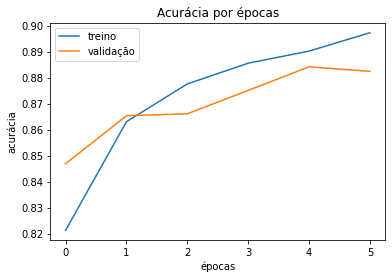

In [9]:
#historico.history
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época.

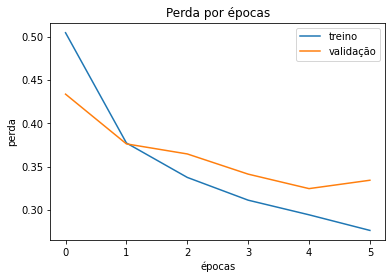

In [10]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

Avaliando o modelo

In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste', perda_teste)
print('Acurácia do teste', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.8706
Perda do teste 0.36748427152633667
Acurácia do teste 0.8705999851226807
